# Credit Card Analysis and Fraud Detection

##### We need to import some libraries and create the engine to connect with the DB

In [1]:
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine

driver = 'mysql+pymysql:'
user = 'root'
password = ''
ip = '127.0.0.1'
db = 'Final_project'
connection_string = f'{driver}//{user}:{password}@{ip}/{db}'

In [11]:
query = """SELECT Transaction_base.credit_card_id, Transaction_base.Transaction_Date, 
Transaction_base.Transaction_Value, Card_base.Card_Family, Card_base.Credit_limit, Customer_base.Age, 
Transaction_base.Transaction_ID, Transaction_base.Transaction_Segment, IFNULL(Fraud_base.Fraud_Flag,0) as Fraud_flag
FROM Transaction_base 
LEFT JOIN Fraud_base
ON Transaction_base.Transaction_ID = Fraud_base.Transaction_ID
LEFT JOIN Card_base
ON Transaction_base.Credit_Card_ID = Card_base.Card_Number
LEFT JOIN Customer_base
ON Card_base.Cust_ID = Customer_base.Cust_ID;"""
engine = create_engine(connection_string)

In [18]:
transaction_df = pd.read_sql(query, engine)

In [19]:
transaction_df_original = transaction_df.copy()

In [20]:
transaction_df.head()

,credit_card_id,Transaction_Date,Transaction_Value,Card_Family,Credit_limit,Age,Transaction_ID,Transaction_Segment,Fraud_flag
0,1629-9566-3285-2123,2016-04-24,23649.0,Platinum,194000,23,CTID28830551,SEG25,0
1,3697-6001-4909-5350,2016-02-11,26726.0,Gold,15000,48,CTID45504917,SEG16,0
2,5864-4475-3659-1440,2016-11-01,22012.0,Gold,2000,23,CTID47312290,SEG14,0
3,5991-4421-8476-3804,2016-01-28,37637.0,Gold,19000,44,CTID25637718,SEG17,0
4,1893-8853-9900-8478,2016-03-17,5113.0,Premium,417000,42,CTID66743960,SEG14,0


In [21]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
credit_card_id         10000 non-null object
Transaction_Date       10000 non-null object
Transaction_Value      10000 non-null float64
Card_Family            10000 non-null object
Credit_limit           10000 non-null int64
Age                    10000 non-null int64
Transaction_ID         10000 non-null object
Transaction_Segment    10000 non-null object
Fraud_flag             10000 non-null int64
dtypes: float64(1), int64(3), object(5)
memory usage: 703.2+ KB


We check if the fraud_flag column is imbalanced (Yes, it is!)

In [22]:
transaction_df['Fraud_flag'].value_counts()

0    9891
1     109
Name: Fraud_flag, dtype: int64

In [23]:
transaction_df['Fraud_flag'].value_counts()[1]/transaction_df['Fraud_flag'].value_counts()[0]*100

1.1020119300374078

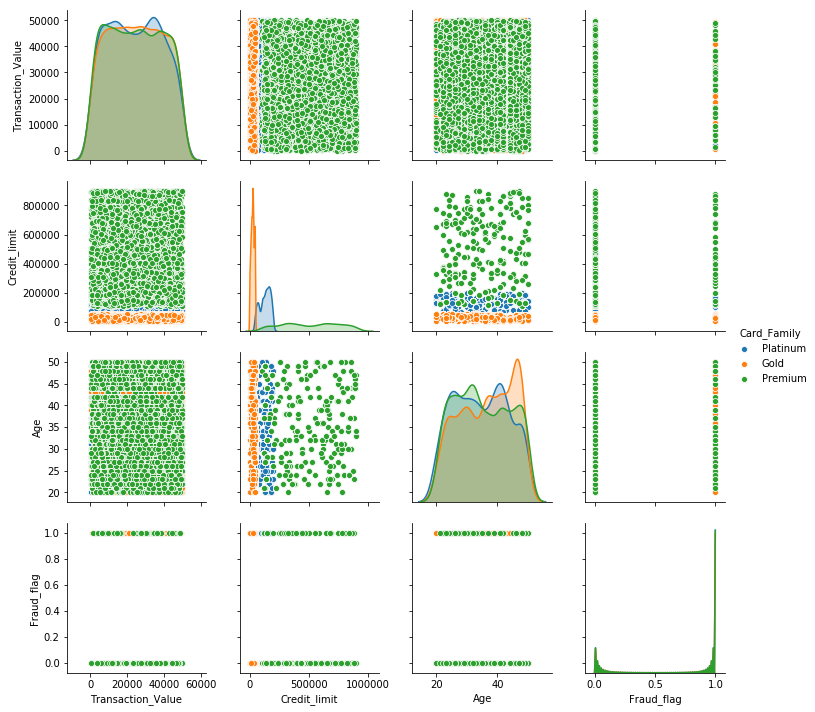

In [24]:
sns.pairplot(transaction_df, hue = 'Card_Family')

/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


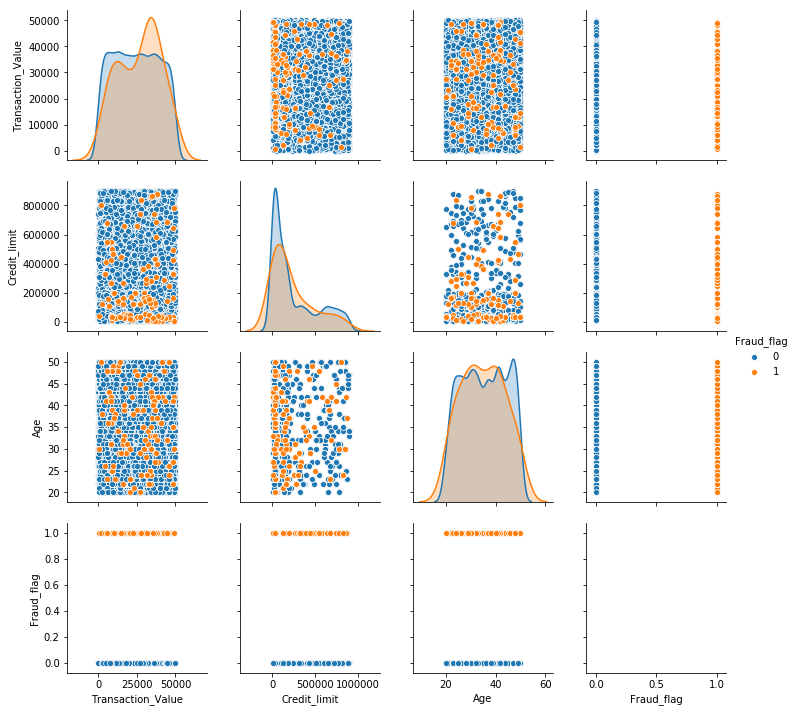

In [25]:
sns.pairplot(transaction_df, hue = 'Fraud_flag')

In [35]:
transaction_df.Transaction_Date = pd.to_datetime(transaction_df['Transaction_Date'], yearfirst = True)

In [47]:
transaction_df['Transaction_Date'] = pd.to_numeric(transaction_df['Transaction_Date'])

In [50]:
X = transaction_df.drop(columns = ['credit_card_id', 'Transaction_ID', 'Transaction_Segment'])

In [54]:
y = X.pop('Fraud_flag')

In [60]:
X = pd.get_dummies(X, drop_first = True)